# Real Estate Data

## Data Processing

First, we have to pull in CPI data. This data gives us an idea of what inflation is because CPI tracks the prices. We read the data in then set the index to be of the type datetime.

In [1]:
import pandas as pd

# Read the data
CPI = pd.read_csv("Data/CPI.csv",index_col=0)

# Rename the columns
CPI.columns = ["CPI"]

# Convert the index to a datetime index
CPI.index = pd.to_datetime(CPI.index)
print(CPI)

                CPI
DATE               
1947-01-01   21.480
1947-02-01   21.620
1947-03-01   22.000
1947-04-01   22.000
1947-05-01   21.950
...             ...
2019-10-01  257.229
2019-11-01  257.824
2019-12-01  258.444
2020-01-01  258.820
2020-02-01  259.050

[878 rows x 1 columns]


Plotting the line will give us some good intuition of what data we are working with.

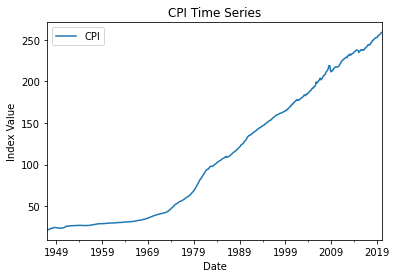

In [2]:
import matplotlib.pyplot as plt

# Plot
CPI.plot(kind="line")

# Add labels
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("CPI Time Series")

plt.show()

We also have an index of real estate prices.

In [3]:
# Read the data in
real_estate = pd.read_csv("Data/Real Estate.csv",index_col=0)

# Set the index to be datetime
real_estate.index = pd.to_datetime(real_estate.index)

# Rename the columns
real_estate.columns = ["Real Estate"]

print(real_estate)

            Real Estate
DATE                   
1975-01-01        59.77
1975-04-01        60.97
1975-07-01        61.18
1975-10-01        62.22
1976-01-01        62.90
...                 ...
2018-10-01       429.86
2019-01-01       434.58
2019-04-01       442.71
2019-07-01       447.87
2019-10-01       451.65

[180 rows x 1 columns]


When we plot the real estate index we see the drop during the financial crisis.

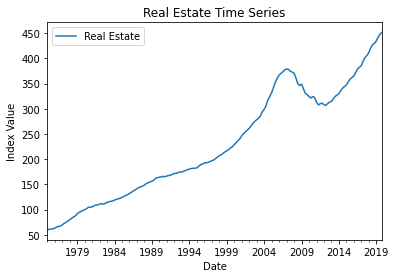

In [4]:
# Plot the data
real_estate.plot(kind="line")

# Add labels
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Real Estate Time Series")

plt.show()

## Index Operations

There are some more advanced index operations we are going to explore in this section of the course. The first thing we can learn to do is grab the quarter for each date. As you can see, it will return integers between 1-4 denoting what quarter a date is in.

In [5]:
# You can access the quarter of the data through the quarter attribute
print(real_estate.index.quarter)

Int64Index([1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
            ...
            3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
           dtype='int64', name='DATE', length=180)


### Multi-index

Pandas allows for indices that are actually with multiple levels. One can create an index like this by calling pd.MultiIndex.from_tuples which will (given tuples) create the multi-index. For example, we can play with something basic below.

In [6]:
# Example of building a multi-index
multi_index = pd.MultiIndex.from_tuples([("A", 1),
                                        ("B", 2),
                                        ("C", 3)])
print(multi_index)

MultiIndex([('A', 1),
            ('B', 2),
            ('C', 3)],
           )


Zip can turn two or more lists into a list of tuples like so below. We show how with the prior data.

In [7]:
# Show zipping
letters = ["A", "B", "C"]
numbers = [1, 2, 3]
l = list(zip(letters, numbers))
print(l)

[('A', 1), ('B', 2), ('C', 3)]


Bringing both of these concepts together, we can make a multi-index for our data by zipping the year and the quarter of the real estate data and then converting it to a multi-index.

In [8]:
# By using zip, we can create a multi index where the dates become the year and quarter
multi_index = pd.MultiIndex.from_tuples(zip(real_estate.index.year,real_estate.index.quarter))
print(multi_index)

MultiIndex([(1975, 1),
            (1975, 2),
            (1975, 3),
            (1975, 4),
            (1976, 1),
            (1976, 2),
            (1976, 3),
            (1976, 4),
            (1977, 1),
            (1977, 2),
            ...
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2),
            (2019, 3),
            (2019, 4)],
           length=180)


In [9]:
# Set the real estate index
real_estate.index = multi_index
print(real_estate)

        Real Estate
1975 1        59.77
     2        60.97
     3        61.18
     4        62.22
1976 1        62.90
...             ...
2018 4       429.86
2019 1       434.58
     2       442.71
     3       447.87
     4       451.65

[180 rows x 1 columns]


You can actually index into the year if you want which is really nice for quicker access.

In [10]:
# Get the 2017 data
print(real_estate.loc[2017])

   Real Estate
1       385.83
2       395.29
3       401.97
4       405.83


This approach is going to come in very handy for converting our current CPI data to being of the frequency of quarterly. The way to accomplish this is to take our CPI dataframe, group by the year and quarter, and then we call the last() function on that. It will return to us, for each quarter, the last value that was present there. 

In [11]:
# If we group the CPI by quarter and year, we can apply the last function to get the latest row for each
# combination of quarter and year
quarterly_CPI = CPI.groupby([CPI.index.year, CPI.index.quarter]).last()
print(quarterly_CPI)

               CPI
DATE DATE         
1947 1      22.000
     2      22.080
     3      22.840
     4      23.410
1948 1      23.500
...            ...
2019 1     254.095
     2     255.402
     3     256.593
     4     258.444
2020 1     259.050

[293 rows x 1 columns]


There are also names that can be given to each level of the multi-index. For our two quarterly sets of data, we want to give them the name of year and quarter.

In [12]:
# Rename the indices
real_estate.index.names = ["Year", "Quarter"]
quarterly_CPI.index.names = ["Year", "Quarter"]
print(real_estate.head(5))
print()
print()
print(quarterly_CPI.head(5))

              Real Estate
Year Quarter             
1975 1              59.77
     2              60.97
     3              61.18
     4              62.22
1976 1              62.90


                CPI
Year Quarter       
1947 1        22.00
     2        22.08
     3        22.84
     4        23.41
1948 1        23.50


Finally, we join them together!

In [13]:
# Join the two together
data = real_estate.join(quarterly_CPI)
print(data)

              Real Estate      CPI
Year Quarter                      
1975 1              59.77   52.800
     2              60.97   53.500
     3              61.18   54.600
     4              62.22   55.600
1976 1              62.90   56.000
...                   ...      ...
2018 4             429.86  252.653
2019 1             434.58  254.095
     2             442.71  255.402
     3             447.87  256.593
     4             451.65  258.444

[180 rows x 2 columns]


For our analysis of the real estate values, we are going to want to first find a baseline value. Let's use the end of 2000 as this value.

In [14]:
#Let's see what the values were at the end of 2000
print(data.loc[(1999,4)])

Real Estate    224.6
CPI            168.8
Name: (1999, 4), dtype: float64


We will find the total return since 2000 by dividing the values by this slice of the data.

In [15]:
#If we were to divide the data by this date and see from 2000 on, we would be able to see the group since 2000 began
returns = data / data.loc[(1999,4)]
returns = returns.loc[(2000,1):]

print(returns)

              Real Estate       CPI
Year Quarter                       
2000 1           1.019145  1.013033
     2           1.035752  1.020142
     3           1.054586  1.028436
     4           1.070837  1.034360
2001 1           1.097240  1.043246
...                   ...       ...
2018 4           1.913891  1.496759
2019 1           1.934907  1.505302
     2           1.971104  1.513045
     3           1.994078  1.520101
     4           2.010908  1.531066

[80 rows x 2 columns]


## Plotting the Real Estate Data

With some simple plotting, we discover what the relationship between real estate and inflation looks like, as well as one area for improvement within the graphing (the fact that we do have a weird x-axis in this case).

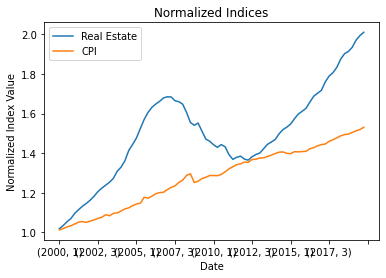

In [16]:
# Plot the data
ax = returns.plot(kind='line')
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")
plt.show()

### Setting Tick Rotation

By calling plt.xticks and passing in a value for rotation, we can change how rotated the tick labels are. This will make it much more readable. Below we see how to rotate to 70 degrees.

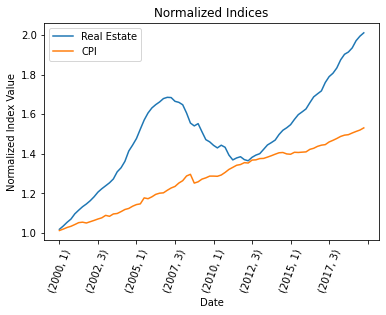

In [17]:
# Plot the data
ax = returns.plot(kind='line')

# Add labels
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")

# Add rotation
plt.xticks(rotation=70)

plt.show()


### Setting Tick Positions

Now that we have more space, we can also add more of the labels. For example, maybe we want a label every year. To do that, we first need to find the index positions and then grab every fourth one.

In [18]:
#Now let's find every 4th index
index_positions = list(range(len(returns.index)))
print(index_positions)
print()
print(index_positions[::4])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76]


### Changing Ticks

Calling ax.xaxis.set_ticks and passing this in will give you the index positioning at this location. However, we end up noticing some interesting behavior happening where it just filters the indices to be ones that were every fourth index.

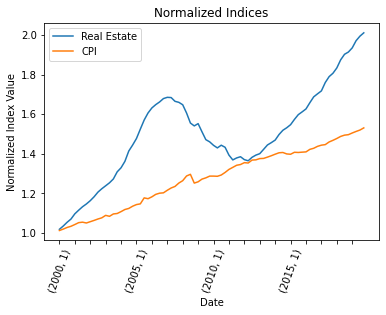

In [19]:
# Plot the data
ax = returns.plot(kind='line')

# Add labels
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")

# Add rotation
plt.xticks(rotation=70)

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])

plt.show()

What we are going to do now is create the ticks that we want for the labels and feed them in to fit every fourth tick. First we take the index and make a new labeling to it.

To better represent the axis, we are going to make our own custom labels. We want to have one where the form is something like 2000Q1. To do it we map a lambda function on our current index.

In [20]:
# Map a new index
quarter_index = returns.index.map(lambda x: str(x[0]) +"Q"+str(x[1]))
print(quarter_index)

Index(['2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3',
       '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2',
       '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
       '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3', '2006Q4',
       '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
       '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
       '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3',
       '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
       '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4'],
      dtype='object')


Then call set_ticklabels passing in the quarter index!

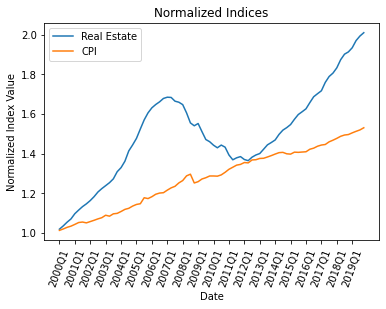

In [21]:
# Plot the data
ax = returns.plot(kind='line')

# Add labels
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")

# Add rotation
plt.xticks(rotation=70)

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])

plt.show()

### Saving our Figure

We are done with creating the figure, now we can save it down with the usual plt.savefig!

In [22]:
# Plot the data
ax = returns.plot(kind='line')

# Add labels
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")

# Add rotation
plt.xticks(rotation=70)

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])

# Save figure
plt.savefig("Images/Real Estate vs. Inflation.png")
plt.close()

We are going to actually make one minor modification and use bbox_inches="tight" as a parameter which will ensure all text and pieces of the figure is fit into the figure that is saved!

In [23]:
# Plot the data
ax = returns.plot(kind='line')

# Add labels
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")

# Add rotation
plt.xticks(rotation=70)

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])

# Save figure
plt.savefig("Images/Real Estate vs. Inflation.png", bbox_inches="tight")
plt.close()

## Adjusting for Inflation

With almost all asset prices, we often are going to want to put them relative to inflation over time as a fair comparison point. In the following few blocks of code we will normalize for the effects of inflation by dividing by the inflation index for each real estate price.

In [24]:
# Create a field measuring the total growth in real estate adjusted for inflation
returns["Real Estate Inflation Adjusted"] = returns["Real Estate"] / returns["CPI"]
print(returns)

              Real Estate       CPI  Real Estate Inflation Adjusted
Year Quarter                                                       
2000 1           1.019145  1.013033                        1.006033
     2           1.035752  1.020142                        1.015302
     3           1.054586  1.028436                        1.025427
     4           1.070837  1.034360                        1.035265
2001 1           1.097240  1.043246                        1.051755
...                   ...       ...                             ...
2018 4           1.913891  1.496759                        1.278690
2019 1           1.934907  1.505302                        1.285394
     2           1.971104  1.513045                        1.302740
     3           1.994078  1.520101                        1.311807
     4           2.010908  1.531066                        1.313404

[80 rows x 3 columns]


### Plotting our Data

We can plot our data similar to how we did prior!

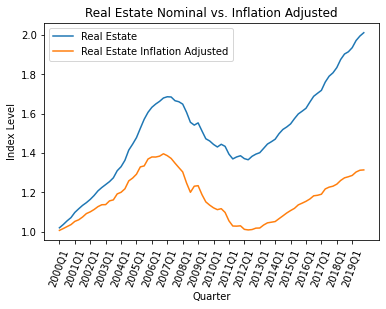

In [25]:
# Plot the data
ax = returns[["Real Estate", "Real Estate Inflation Adjusted"]].plot(kind='line')

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])

# Add rotation
plt.xticks(rotation=70)

# Add labeling
plt.xlabel("Quarter")
plt.ylabel("Index Level")
plt.title("Real Estate Nominal vs. Inflation Adjusted")

plt.show()

Now take this and save it down!

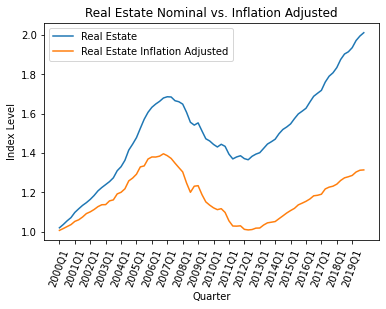

In [26]:
# Plot the data
ax = returns[["Real Estate", "Real Estate Inflation Adjusted"]].plot(kind='line')

# Set ticks
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])

# Add rotation
plt.xticks(rotation=70)

# Add labeling
plt.xlabel("Quarter")
plt.ylabel("Index Level")
plt.title("Real Estate Nominal vs. Inflation Adjusted")

# Save the figure
plt.savefig("Images/Real Estate Inflation Adjusted.png", bbox_inches="tight")

### Converting to Quarterly Percentage Returns

By using the pct_change function, we can get the quarterly percentage changes on real estate and also pivot our data to display it with year as the index, quarter as the columns.

In [27]:
# Using pct_change() gives the perctange change between periods
quarterly_returns = data[["Real Estate"]].pct_change().reset_index()
print(quarterly_returns)

     Year  Quarter  Real Estate
0    1975        1          NaN
1    1975        2     0.020077
2    1975        3     0.003444
3    1975        4     0.016999
4    1976        1     0.010929
..    ...      ...          ...
175  2018        4     0.005944
176  2019        1     0.010980
177  2019        2     0.018708
178  2019        3     0.011655
179  2019        4     0.008440

[180 rows x 3 columns]


By calling pivot we can define the index (Year), the columns (Quarter) and the values (Real Estate) to pivot our data into. This is similar to a pivot table in microsoft excel for those who have used them before.

In [28]:
quarterly_returns = quarterly_returns.pivot("Year", "Quarter", "Real Estate")
print(quarterly_returns)

Quarter         1         2         3         4
Year                                           
1975          NaN  0.020077  0.003444  0.016999
1976     0.010929  0.039746  0.018349  0.011411
1977     0.030879  0.046803  0.023525  0.038306
1978     0.030421  0.039322  0.030098  0.026754
1979     0.044571  0.032823  0.020975  0.019817
1980     0.017397  0.016000  0.028642  0.002679
1981     0.005535  0.020689  0.014877  0.000550
1982     0.016116  0.008741 -0.009380  0.012535
1983     0.017545  0.011204  0.007877  0.005668
1984     0.015371  0.013036  0.009215  0.008062
1985     0.014199  0.015127  0.015457  0.011162
1986     0.019299  0.020827  0.015135  0.015494
1987     0.019791  0.015385  0.011329  0.006460
1988     0.015637  0.019900  0.010283  0.009265
1989     0.011637  0.013740  0.021181  0.008334
1990     0.005571  0.004140  0.006003 -0.003918
1991     0.008350  0.006781  0.001669  0.014102
1992     0.007745 -0.000233  0.011473  0.005009
1993     0.000401  0.009506  0.008055  0

We are only interested in 2000 and on so we cut the data before that.

In [29]:
# Cut to 2000 and on
quarterly_returns = quarterly_returns.loc['2000':]
print(quarterly_returns)

Quarter         1         2         3         4
Year                                           
2000     0.019145  0.016295  0.018183  0.015410
2001     0.024656  0.016759  0.015525  0.012418
2002     0.014362  0.017029  0.019829  0.014168
2003     0.012187  0.012184  0.015411  0.028326
2004     0.015643  0.024409  0.038143  0.021346
2005     0.022965  0.031942  0.030194  0.022648
2006     0.015827  0.010232  0.008211  0.010260
2007     0.003739 -0.000687 -0.011236 -0.003155
2008    -0.007296 -0.025317 -0.031519 -0.009274
2009     0.007396 -0.026413 -0.026305 -0.007593
2010    -0.012011 -0.009010  0.009527 -0.007248
2011    -0.027587 -0.017412  0.007316  0.004422
2012    -0.010605 -0.004222  0.012917  0.007986
2013     0.005207  0.015573  0.015522  0.008166
2014     0.008803  0.019089  0.014360  0.008354
2015     0.010145  0.017208  0.015248  0.008805
2016     0.009170  0.019296  0.017857  0.009101
2017     0.008680  0.024519  0.016899  0.009603
2018     0.014785  0.022364  0.014915  0

In [30]:
# Save our data!
quarterly_returns.to_csv("Tables/Real Estate Returns.csv")